<a href="https://colab.research.google.com/github/mokalakshyachandrika/BharatInternNetflix/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anmolkumar/house-price-prediction-challenge")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/anmolkumar/house-price-prediction-challenge/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler

In [ ]:
data=pd.read_csv(path + "/train.csv")

In [ ]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [ ]:
data["BHK_OR_RK"].value_counts()

,count
BHK_OR_RK,
BHK,29427
RK,24


In [ ]:
Test_Data=pd.read_csv(path + "/test.csv")

In [ ]:
datac=data.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


The dataset contains 29,451 entries and 12 columns. The columns include both numerical and categorical data types.

**Numerical Data:** There are 9 numerical columns, including variables like Square Footage, Price, and BHK count. No missing values are present.

**Categorical Data:** The columns POSTED_BY, BHK_OR_RK, and ADDRESS are categorical (object type), and all have complete data.

In [ ]:
data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

The dataset contains the following columns:

**POSTED_BY:** Indicates who posted the listing (categorical: "Owner", "Dealer", etc.).

**UNDER_CONSTRUCTION:** Specifies whether the property is under construction (binary: 0 or 1).

**RERA:** Indicates if the property is RERA approved (binary: 0 or 1).

**BHK_NO.:** Number of bedrooms in the property (integer).

**BHK_OR_RK:** Type of property (categorical: "BHK" or "RK").

**SQUARE_FT:** Total square footage of the property (numeric).

**READY_TO_MOVE:** Indicates if the property is ready to move in (binary: 0 or 1).

**RESALE:** Specifies if the property is a resale unit (binary: 0 or 1).

**ADDRESS:** Location details of the property (categorical).

**LONGITUDE:** Longitude coordinate of the property (numeric).

**LATITUDE:** Latitude coordinate of the property (numeric).

**TARGET(PRICE_IN_LACS):** Property price in lakhs (numeric).

In [ ]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


Exploratory Data Analysis (EDA) Summary:
The dataset consists of 29,451 records with 9 numerical columns related to real estate properties. Below are key insights:

**1. Under Construction Status:**
18% of properties are under construction, while 82% are ready-to-move.
Majority of the properties are already completed and available for immediate occupancy.

**2. RERA Registration:**
31.8% of properties are RERA registered, while the rest are not.
A significant portion of properties is not registered under RERA, which could indicate regulatory concerns.

**3. Ready-to-Move vs. Resale Properties:**
82% of properties are ready-to-move, and 93% are resale properties.
Indicates that the secondary real estate market is dominant in this dataset.

**4. BHK Distribution:**
Mean BHK = 2.39, with a minimum of 1 BHK and a maximum of 20 BHK.
Q1 (25%) = 2 BHK, Q2 (Median) = 2 BHK, Q3 (75%) = 3 BHK, meaning that most properties have 2–3 BHK.
Possible Outliers: Properties with more than 4 BHK might be uncommon and should be analyzed.

**5. Property Size (Square Feet):**
Mean size = 19,802 sq. ft., but highly skewed due to outliers.
Q1 (25%) = 900 sq. ft., Q2 (Median) = 1,175 sq. ft., Q3 (75%) = 1,550 sq. ft.
The max value is 254.5M sq. ft., which is unrealistic and likely an error.
Most properties range between 900 – 1,550 sq. ft., with some extreme values inflating the mean.

**6. Geographical Distribution (Longitude & Latitude):**
Longitude: Q1 = 18.45, Q2 = 20.75, Q3 = 26.90
Latitude: Q1 = 73.79, Q2 = 77.32, Q3 = 77.82
The dataset covers a wide range of locations, but some extreme longitude (-37.71 to 59.91) and latitude (-121.76 to 152.96) values indicate possible incorrect or missing geographic data.

**7. Property Prices:**
Mean price = 142.89 lakhs, with prices ranging from 0.25 lakhs to 30,000 lakhs.
Q1 (25%) = 38 lakhs, Q2 (Median) = 62 lakhs, Q3 (75%) = 100 lakhs.
High standard deviation (656.88 lakhs) suggests significant variation in property prices.
Possible price outliers at the extreme end need further investigation.


In [ ]:
data.describe(include='object')

,POSTED_BY,BHK_OR_RK,ADDRESS
count,29451,29451,29451
unique,3,2,6899
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,18291,29427,509


**1. Posted By:**
Unique categories: 3 (Owner, Dealer, Builder)
Most frequent category: Dealer (appears 18,291 times)
Indicates that most property listings are posted by dealers, followed by owners and builders.

**2. BHK or RK Classification:**
Unique categories: 2 (BHK, RK)
Most frequent category: BHK (appears 29,427 times)
RK (Room Kitchen) listings are very rare in comparison to BHK properties.

**3. Address Analysis:**
Unique locations: 6,899
Most frequent location: Zirakpur, Chandigarh (appears 509 times)
Zirakpur, a suburban area in Chandigarh, appears to be a hotspot for property listings.


<Axes: >

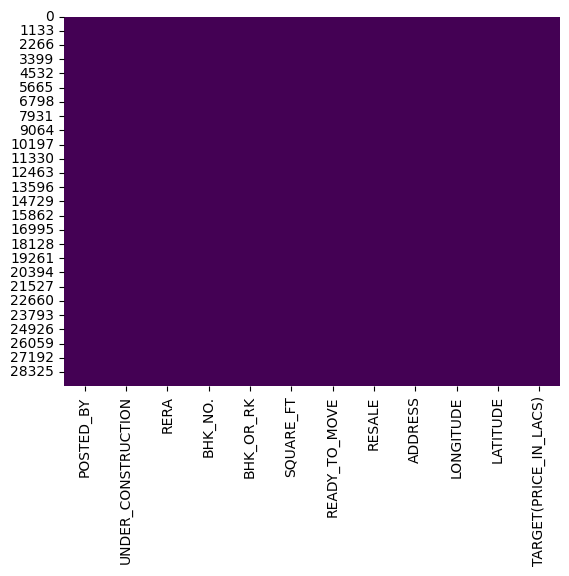

In [ ]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

From the analysis, we can clearly state that there are no null values present in the dataset, ensuring that all records are complete and ready for further processing without requiring imputation or handling of missing data.

# Box plot for checking outliers

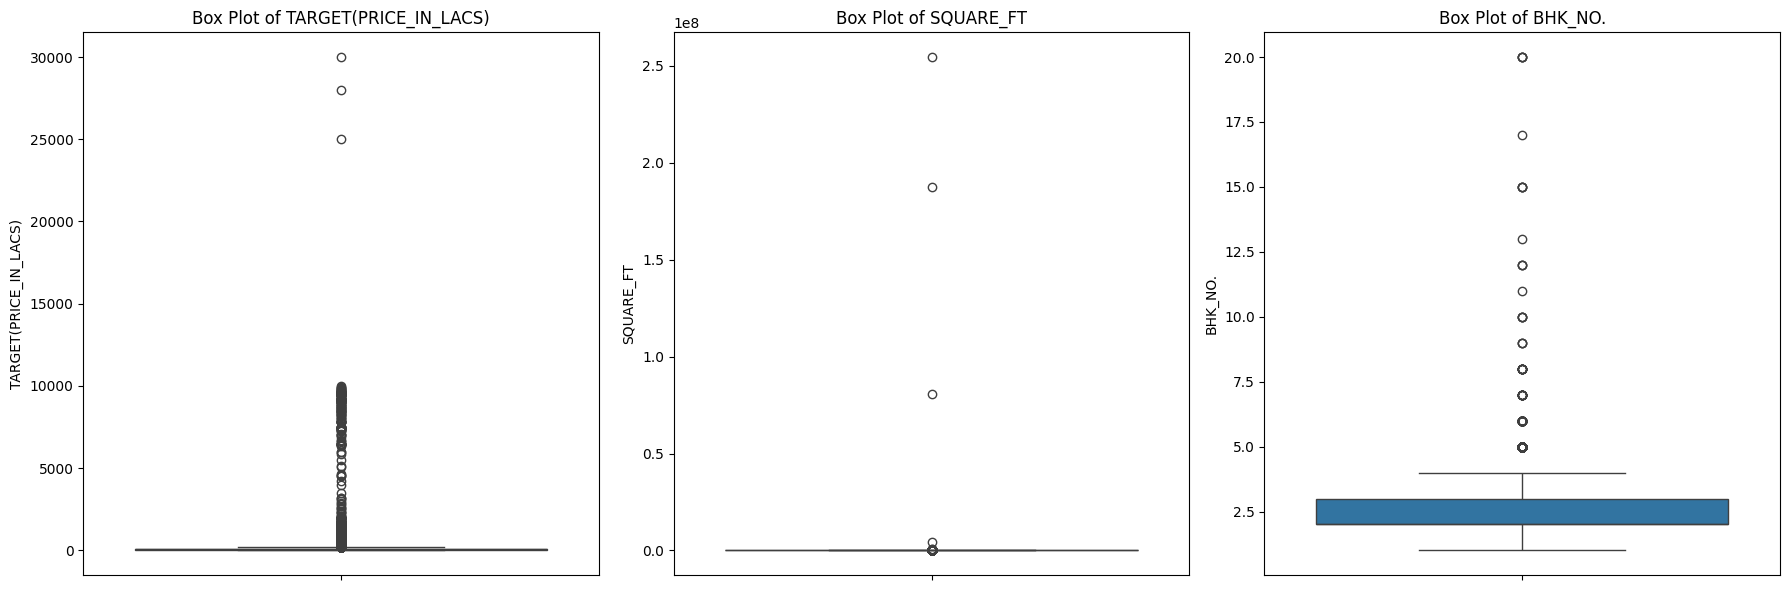

In [ ]:
numerical_features = ["TARGET(PRICE_IN_LACS)", "SQUARE_FT", "BHK_NO."]


fig, axes = plt.subplots(1, 3, figsize=(18, 6))


for i, feature in enumerate(numerical_features):
    sns.boxplot(y=data[feature], ax=axes[i])
    axes[i].set_title(f"Box Plot of {feature}")

plt.tight_layout()
plt.show()


From the box plot analysis, we observed the presence of extreme outliers in the dataset. Since outliers can significantly impact model performance, we will train the model using three different approaches to analyze their effect:

**Dropping Outliers** - Removing extreme values based on the Interquartile Range (IQR). This reduces noise but may lead to data loss.

**Clipping Outliers** - Capping extreme values within the IQR range, preventing outliers from skewing the model.

**Keeping Outliers** - Train the model by keeping Outliers

# Data Cleaning

In [ ]:
data.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0


From the above data, the Address column provides the same information as the Longitude and Latitude columns. Since Longitude and Latitude offer a more precise and numerical representation of location, the Address column becomes redundant. To reduce dimensionality and enhance machine learning model performance, we can safely drop the Address column without losing any crucial information.

In [ ]:
data.drop('ADDRESS',axis=1,inplace=True)

In [ ]:
data.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0


# Droping and Cliping outliers

In [ ]:
import pandas as pd

def remove_outliers(df):

    df_numeric = df.select_dtypes(include=['number'])

    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]

def clip_outliers(df):
    df_numeric = df.select_dtypes(include=['number'])

    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_numeric_clipped = df_numeric.clip(lower=lower_bound, upper=upper_bound, axis=1)

    df[df_numeric.columns] = df_numeric_clipped

    return df


data_no_outliers = remove_outliers(data)
data_clipped = clip_outliers(data)


# EDA

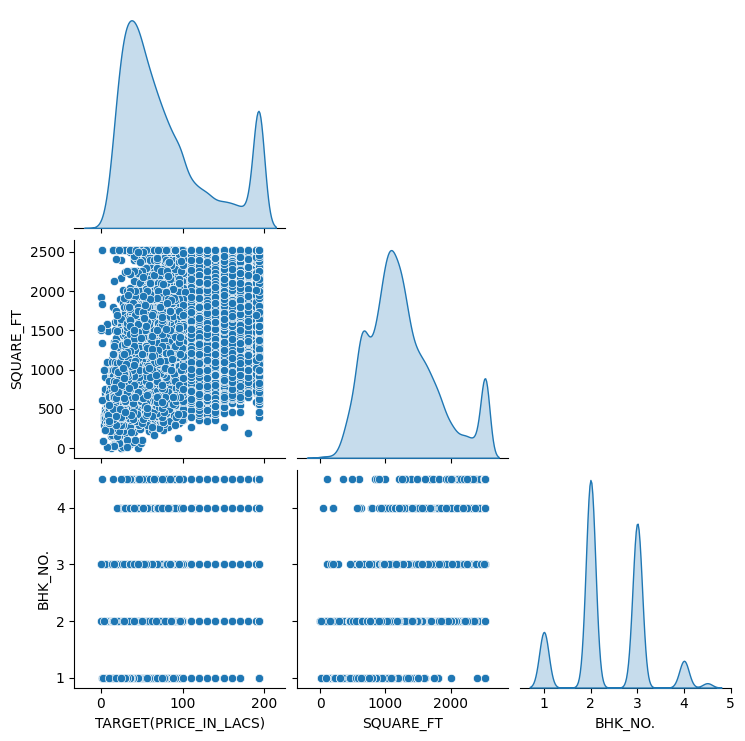

In [ ]:
sns.pairplot(data[["TARGET(PRICE_IN_LACS)", "SQUARE_FT", "BHK_NO."]],diag_kind='kde',corner=True)
plt.show()

There is a clear positive correlation between square footage (SQUARE_FT) and the number of bedrooms (BHK_NO.), indicating that larger homes tend to have more bedrooms.

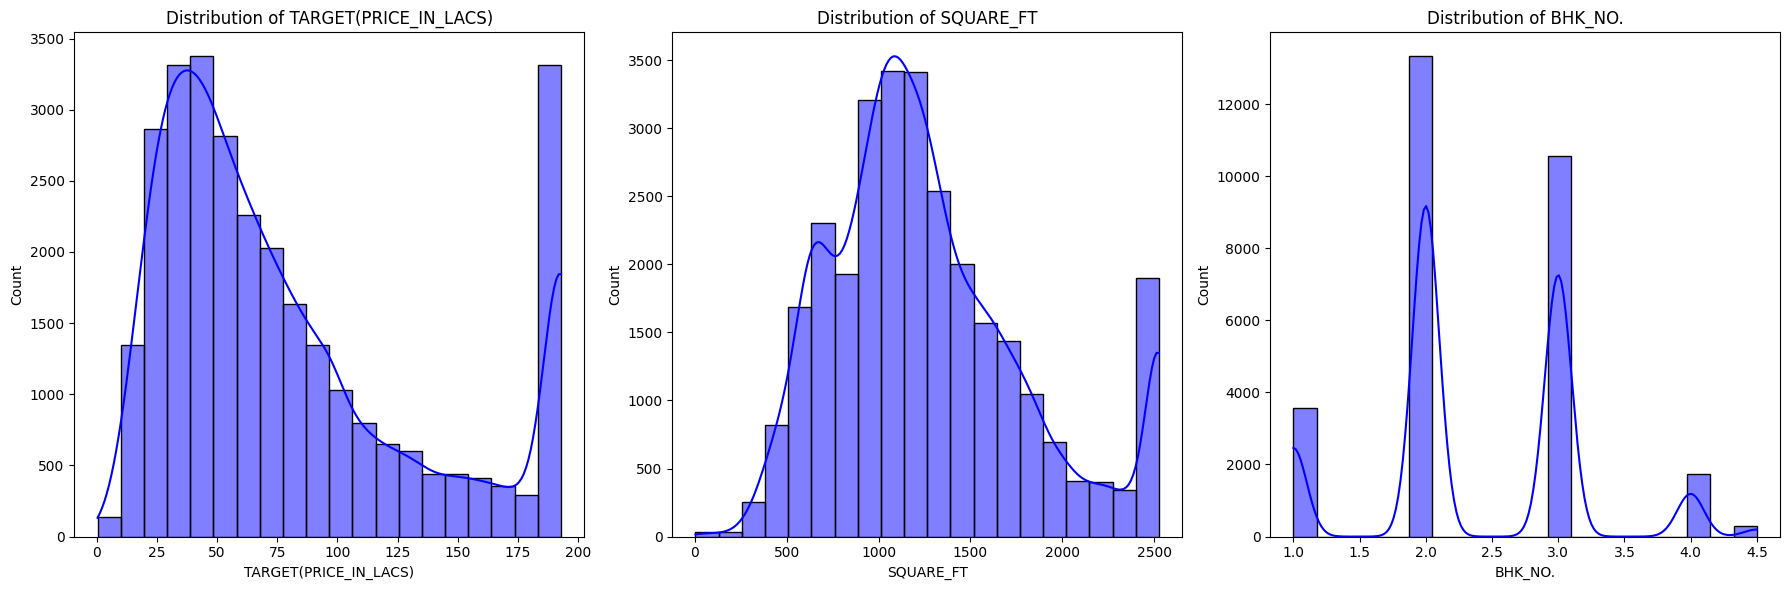

In [ ]:
numerical_features = ["TARGET(PRICE_IN_LACS)", "SQUARE_FT", "BHK_NO."]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], bins=20, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


Most properties are priced between 25-75 lacs, with some high-end properties influencing the distribution.

Square footage follows a bimodal distribution, indicating two primary categories of houses (regular apartments and larger villas).

2BHK and 3BHK dominate the market, while 4BHK+ properties are relatively rare.

Potential outliers exist in price and square footage, which may require further analysis or filtering.

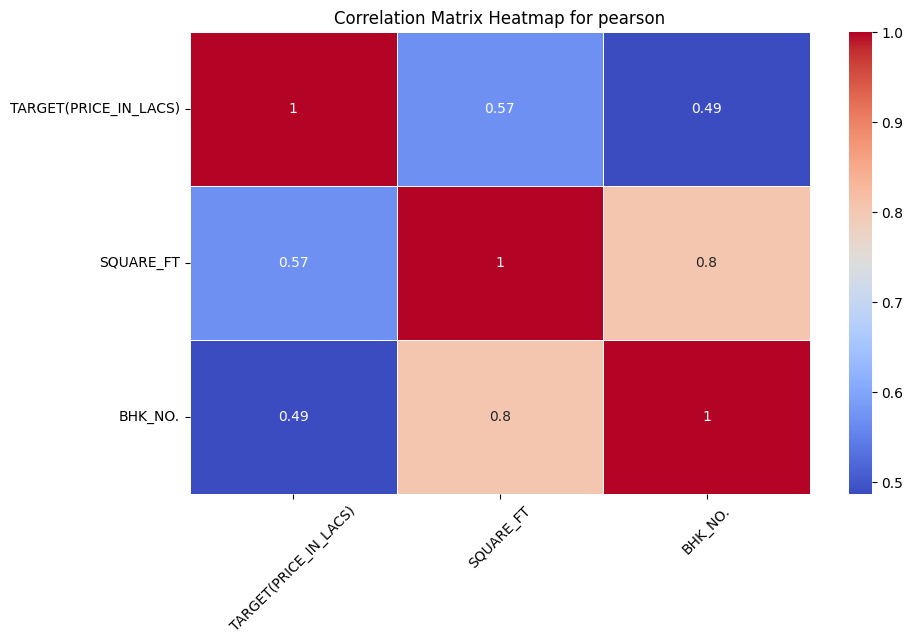

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(data[["TARGET(PRICE_IN_LACS)", "SQUARE_FT", "BHK_NO."]].corr(method='pearson'), annot=True, cmap='coolwarm', linewidths=0.5)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.title("Correlation Matrix Heatmap for pearson")
plt.show()

**SQUARE_FT and BHK_NO**. are positiveky correlated (0.8) → More bedrooms generally mean larger square footage.

**TARGET(PRICE_IN_LACS)** is moderately positively correlated with SQUARE_FT (0.57) → Larger properties tend to have higher prices.

**TARGET(PRICE_IN_LACS)** also correlates with BHK_NO. (0.49) → More bedrooms slightly increase property prices.

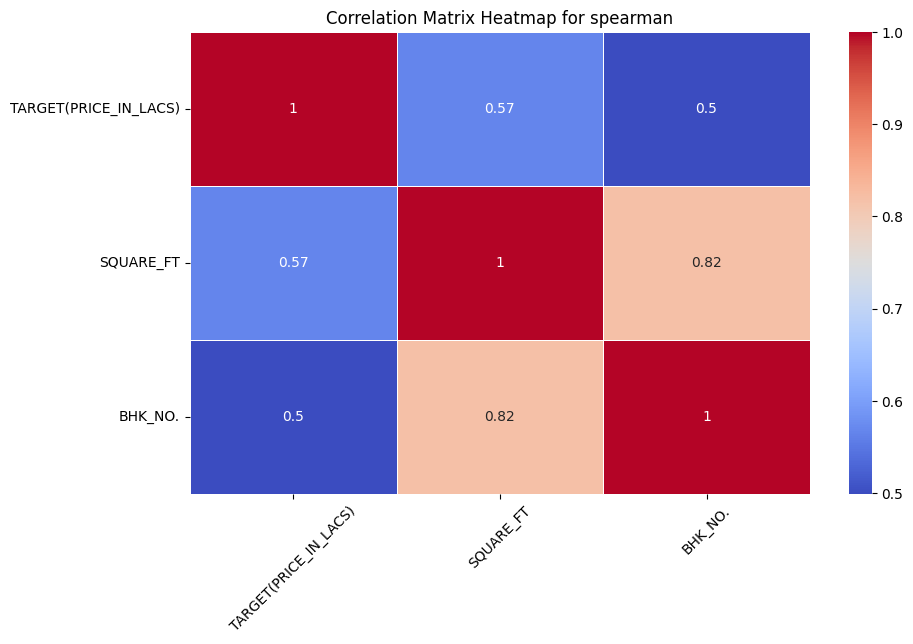

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(data[["TARGET(PRICE_IN_LACS)", "SQUARE_FT", "BHK_NO."]].corr(method='spearman'), annot=True, cmap='coolwarm', linewidths=0.5)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.title("Correlation Matrix Heatmap for spearman")
plt.show()

From the above grpah also we can see that there is no major change correlation

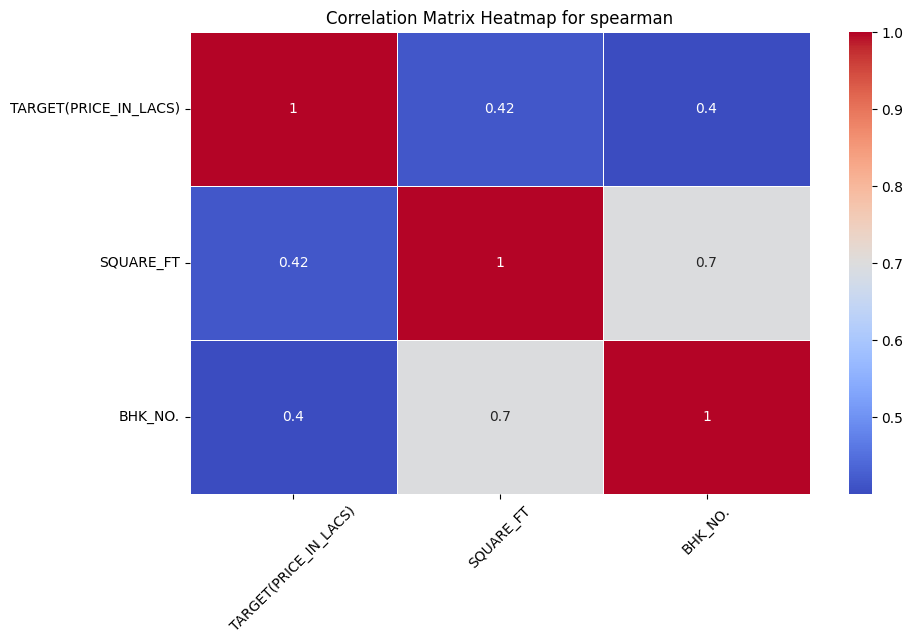

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(data[["TARGET(PRICE_IN_LACS)", "SQUARE_FT", "BHK_NO."]].corr(method='kendall'), annot=True, cmap='coolwarm', linewidths=0.5)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.title("Correlation Matrix Heatmap for spearman")
plt.show()

From the above graph we can see that there was slight decrease in the correlation bcause kendall is less effected by outliers

#Data Processing on data which is having outliers in some columns

In [ ]:
data.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2.0,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,12.274538,76.644605,51.0


In [ ]:
fv=data.iloc[:,:-1]
cv=data.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=42)

In [ ]:
x_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
20898,Dealer,0,0,2.0,BHK,709.113608,1,1,22.486964,83.874699
28923,Owner,0,0,3.0,BHK,1800.370665,1,1,27.400000,82.960000
12216,Dealer,0,1,4.5,BHK,2526.688616,1,1,24.690280,78.418890
6216,Dealer,0,0,3.0,BHK,2526.688616,1,1,28.522931,77.357078
22404,Owner,0,0,2.0,BHK,900.109770,1,1,23.166495,72.634290
...,...,...,...,...,...,...,...,...,...,...
21575,Dealer,0,0,3.0,BHK,2026.085855,1,1,28.919600,76.897200
5390,Dealer,0,0,3.0,BHK,1180.000000,1,1,22.550000,83.874699
860,Dealer,0,1,2.0,BHK,1267.719258,1,1,18.097689,74.735239
15795,Owner,0,0,3.0,BHK,1302.378256,1,1,20.860239,81.285753


In [ ]:
x_train_nominal_data=x_train.iloc[:,[0,4]]

In [ ]:
x_train_nominal_data.head(2)

,POSTED_BY,BHK_OR_RK
20898,Dealer,BHK
28923,Owner,BHK


In [ ]:
x_test_nominal_data=x_test.iloc[:,[0,4]]

In [ ]:
x_train_ordinal_data=x_train.iloc[:,[1,2,3,6,7]]

In [ ]:
x_train_ordinal_data.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE
20898,0,0,2.0,1,1
28923,0,0,3.0,1,1


In [ ]:
x_test_ordinal_data=x_test.iloc[:,[1,2,3,6,7]]

In [ ]:
x_train_scaling_data=x_train.iloc[:,[5,8,9]]

In [ ]:
x_train_scaling_data.head(2)

,SQUARE_FT,LONGITUDE,LATITUDE
20898,709.113608,22.486964,83.874699
28923,1800.370665,27.400000,82.960000


In [ ]:
x_test_scaling_data=x_test.iloc[:,[5,8,9]]

# Performing Preprocessing on x_train Nominal Data

In [ ]:
ohe=OneHotEncoder(drop='first')
enco_nominal=pd.DataFrame(ohe.fit_transform(x_train_nominal_data).toarray(),index=x_train_nominal_data.index,columns=ohe.get_feature_names_out())

In [ ]:
enco_nominal.head(1)

,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
20898,1.0,0.0,0.0


# Performing Preprocessing x_train on Ordinal Data

In [ ]:
ord=OrdinalEncoder()
enco_ordinal=pd.DataFrame(ord.fit_transform(x_train_ordinal_data),index=x_train_ordinal_data.index,columns=x_train_ordinal_data.columns)

In [ ]:
enco_ordinal.head(1)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE
20898,0.0,0.0,1.0,0.0,0.0


# Performing Robust Scaling on x_train as data is having outliers

In [ ]:
re=RobustScaler()
enco_scaling=pd.DataFrame(re.fit_transform(x_train_scaling_data),index=x_train_scaling_data.index,columns=x_train_scaling_data.columns)

In [ ]:
enco_scaling.head(2)

,SQUARE_FT,LONGITUDE,LATITUDE
20898,-0.714902,0.206527,1.628517
28923,0.958431,0.788071,1.401088


# Creating Final Train data

In [ ]:
x_train_final=pd.concat([enco_nominal,enco_ordinal,enco_scaling],axis=1)

In [ ]:
x_train_final.head(1)

,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,SQUARE_FT,LONGITUDE,LATITUDE
20898,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.714902,0.206527,1.628517


# Performing Preprocessing on x_test Nominal Data

In [ ]:
enco_nominal_test=pd.DataFrame(ohe.transform(x_test_nominal_data).toarray(),index=x_test_nominal_data.index,columns=ohe.get_feature_names_out())

In [ ]:
enco_nominal_test.head(2)

,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
21992,1.0,0.0,0.0
29060,1.0,0.0,0.0


# Performing Preprocessing on x_test ordinal Data

In [ ]:
enco_ordinal_test=pd.DataFrame(ord.transform(x_test_ordinal_data),index=x_test_ordinal_data.index,columns=x_train_ordinal_data.columns)

In [ ]:
enco_ordinal_test.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE
21992,0.0,0.0,2.0,0.0,0.0
29060,0.0,0.0,2.0,0.0,0.0


# Performing Robust Scaling on x_test as data is having outliers

In [ ]:
enco_scaling_test=pd.DataFrame(re.transform(x_test_scaling_data),index=x_test_scaling_data.index,columns=x_train_scaling_data.columns)

In [ ]:
enco_scaling_test.head(2)

,SQUARE_FT,LONGITUDE,LATITUDE
21992,-0.180079,0.206114,1.628517
29060,0.253401,0.913163,-0.056139


In [ ]:
x_test_final=pd.concat([enco_nominal_test,enco_ordinal_test,enco_scaling_test],axis=1)

In [ ]:
x_test_final.head(2)

,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,SQUARE_FT,LONGITUDE,LATITUDE
21992,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-0.180079,0.206114,1.628517
29060,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.253401,0.913163,-0.056139


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [ ]:
x_train_final.shape

(23560, 11)

In [ ]:
(23560//3)*(3-1)

15706

In [ ]:
def objective(trail):
  algo=trail.suggest_categorical('algo',['knn','dt','lr'])
  if algo=="knn":
    k=n_neighbors=trail.suggest_int('k',3,100)
    weights=trail.suggest_categorical('weights',['uniform','distance'])
    p1=trail.suggest_int("distance",1,2)
    alg=trail.suggest_categorical("algorithm",["ball_tree","kd_tree","brute"])
    model=KNeighborsRegressor(n_neighbors=k,weights=weights,p=p1,algorithm=alg)
    model.fit(x_train_final,y_train)

  elif algo=="dt":
    max_depth=trail.suggest_int("max_depth",1,50)
    min_samples_split=trail.suggest_int("min_samples_split",2,50)
    min_samples_leaf=trail.suggest_int("min_samples_leaf",1,50)
    min_weight_fraction_leaf=trail.suggest_float("min_weight_fraction_leaf",0.0,0.15)
    min_impurity_decrease=trail.suggest_float("min_impurity_decrease",0.0,1.0)
    max_features=trail.suggest_int("max_features",1,7)
    model=DecisionTreeRegressor(max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,min_impurity_decrease=min_impurity_decrease,max_features=max_features)
    model.fit(x_train_final,y_train)

  elif algo=='lr':
    penalty = trail.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
    alpha = trail.suggest_float('alpha', 0.001, 100)
    ratio = trail.suggest_float('ratio', 0.1, 0.9)
    max_iter = trail.suggest_int('max_iter', 100, 1000, step=100)
    model=SGDRegressor(penalty=penalty,alpha=alpha,l1_ratio=ratio,max_iter=max_iter)
    model.fit(x_train_final,y_train)

  cv_score=cross_validate(model,x_train_final,y_train,cv=3,scoring="r2",return_train_score=True)['test_score'].mean()
  train_score=cross_validate(model,x_train_final,y_train,cv=3,scoring="r2",return_train_score=True)['train_score'].mean()
  trail.set_user_attr(key="cv_score",value=cv_score)
  trail.set_user_attr(key="train_score",value=train_score)
  return cv_score

In [ ]:
study=optuna.create_study(direction="maximize",sampler=TPESampler())

[I 2025-03-17 15:46:07,468] A new study created in memory with name: no-name-27e18513-570f-4eed-bb94-76b501ca7583


In [ ]:
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-03-17 15:46:08,800] Trial 1 finished with value: 0.4775177989490655 and parameters: {'algo': 'dt', 'max_depth': 35, 'min_samples_split': 24, 'min_samples_leaf': 45, 'min_weight_fraction_leaf': 0.04251275701225974, 'min_impurity_decrease': 0.6790152987991466, 'max_features': 3}. Best is trial 1 with value: 0.4775177989490655.
[I 2025-03-17 15:46:09,572] Trial 2 finished with value: -0.00010235771014014776 and parameters: {'algo': 'lr', 'penalty': 'elasticnet', 'alpha': 69.82128752059725, 'ratio': 0.664781373779587, 'max_iter': 1000}. Best is trial 1 with value: 0.4775177989490655.
[I 2025-03-17 15:46:10,052] Trial 3 finished with value: 0.009793547894816013 and parameters: {'algo': 'lr', 'penalty': 'elasticnet', 'alpha': 57.558256860919805, 'ratio': 0.12414738333102077, 'max_iter': 200}. Best is trial 1 with value: 0.4775177989490655.
[I 2025-03-17 15:46:34,853] Trial 0 finished with value: 0.6902271431922181 and parameters: {'algo': 'knn', 'k': 28, 'weights': 'uniform', 'distan

In [ ]:
df=study.trials_dataframe()

In [ ]:
study.best_params

{'algo': 'knn',
 'k': 11,
 'weights': 'distance',
 'distance': 2,
 'algorithm': 'kd_tree'}

In [ ]:
study.best_value

0.7390522853958856

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
bg=BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=12,weights='distance',p=1,algorithm='ball_tree'),n_estimators=4,max_samples=10000,bootstrap=True,oob_score=True)

In [ ]:
bg.fit(x_train_final,y_train)

In [ ]:
bg.oob_score_

In [ ]:
r2_score(bg.predict(x_test_final),y_test)

In [ ]:
def objective(trial):

  t1=trial.suggest_int('n_neighbors',3,50)
  w1=trial.suggest_categorical('weights1',['uniform','distance'])
  p=trial.suggest_int('p',1,2)
  model1=KNeighborsRegressor(n_neighbors=t1,weights=w1,p=p)

  t2=trial.suggest_int('n_neighbors1',51,100)
  w2=trial.suggest_categorical('weights2',['uniform','distance'])
  algo=trial.suggest_categorical('algorithm',['ball_tree','kd_tree','brute'])
  model2=KNeighborsRegressor(n_neighbors=t1,weights=w2,algorithm=algo)


  md1=trial.suggest_int('max_depth1',1,20)
  min_samples_split=trial.suggest_int("min_samples_split",2,50)
  min_samples_leaf=trial.suggest_int("min_samples_leaf",1,50)
  min_weight_fraction_leaf=trial.suggest_float("min_weight_fraction_leaf",0.0,0.15)
  model3=DecisionTreeRegressor(max_depth=md1,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf)

  md2=trial.suggest_int('max_depth2',21,50)
  min_impurity_decrease=trial.suggest_float("min_impurity_decrease",0.0,1.0)
  max_features=trial.suggest_int("max_features",1,7)
  model4=DecisionTreeRegressor(max_depth=md2,min_impurity_decrease=min_impurity_decrease,max_features=max_features)

  lr1=trial.suggest_categorical('penalty',['l1','l2','elasticnet'])
  alpha = trial.suggest_float('alpha', 0.001, 100)
  ratio = trial.suggest_float('ratio', 0.1, 0.9)
  max_iter = trial.suggest_int('max_iter', 100, 1000, step=100)
  model5=SGDRegressor(penalty=lr1,alpha=alpha,l1_ratio=ratio,max_iter=max_iter)


  vc=VotingRegressor(estimators=[('knn1',model1),('knn2',model2),('dt1',model3),('dt2',model4),('lr1',model5)])

  cv_score=cross_validate(vc,x_train_final,y_train,cv=3,scoring="r2",return_train_score=True)['test_score'].mean()
  train_score=cross_validate(vc,x_train_final,y_train,cv=3,scoring="r2",return_train_score=True)['train_score'].mean()
  trial.set_user_attr(key="cv_score", value=cv_score)
  trial.set_user_attr(key="train_score",value=train_score)
  return cv_score

In [ ]:
study=optuna.create_study(direction="maximize",sampler=TPESampler())

[I 2025-03-17 16:01:33,477] A new study created in memory with name: no-name-4a2d39d4-5d5a-4673-a804-83d1a6b52434


In [ ]:
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-03-17 16:01:48,578] Trial 1 finished with value: 0.7197570130877371 and parameters: {'n_neighbors': 6, 'weights1': 'distance', 'p': 1, 'n_neighbors1': 68, 'weights2': 'uniform', 'algorithm': 'kd_tree', 'max_depth1': 20, 'min_samples_split': 16, 'min_samples_leaf': 24, 'min_weight_fraction_leaf': 0.0586380886954824, 'max_depth2': 31, 'min_impurity_decrease': 0.09674720842946705, 'max_features': 6, 'penalty': 'elasticnet', 'alpha': 89.58276841235032, 'ratio': 0.49450747914477045, 'max_iter': 300}. Best is trial 1 with value: 0.7197570130877371.
[I 2025-03-17 16:02:08,214] Trial 0 finished with value: 0.6732052134343832 and parameters: {'n_neighbors': 19, 'weights1': 'distance', 'p': 2, 'n_neighbors1': 79, 'weights2': 'distance', 'algorithm': 'brute', 'max_depth1': 14, 'min_samples_split': 39, 'min_samples_leaf': 31, 'min_weight_fraction_leaf': 0.14050267294192614, 'max_depth2': 39, 'min_impurity_decrease': 0.806515964151517, 'max_features': 3, 'penalty': 'l1', 'alpha': 87.0298815

In [ ]:
params=study.best_params

In [ ]:
params

{'n_neighbors': 3,
 'weights1': 'uniform',
 'p': 1,
 'n_neighbors1': 69,
 'weights2': 'uniform',
 'algorithm': 'kd_tree',
 'max_depth1': 20,
 'min_samples_split': 14,
 'min_samples_leaf': 11,
 'min_weight_fraction_leaf': 0.030254067842236637,
 'max_depth2': 25,
 'min_impurity_decrease': 0.012221552832742871,
 'max_features': 7,
 'penalty': 'l1',
 'alpha': 4.040564434927383,
 'ratio': 0.8491617181148939,
 'max_iter': 400}

In [ ]:
value=study.best_value
value

0.7524756458240504

In [ ]:
def objective(trial):

  t1=trial.suggest_int('n_neighbors',3,50)
  w1=trial.suggest_categorical('weights1',['uniform','distance'])
  p=trial.suggest_int('p',1,2)
  model1=KNeighborsRegressor(n_neighbors=t1,weights=w1,p=p)

  t2=trial.suggest_int('n_neighbors1',51,100)
  w2=trial.suggest_categorical('weights2',['uniform','distance'])
  algo=trial.suggest_categorical('algorithm',['ball_tree','kd_tree','brute'])
  model2=KNeighborsRegressor(n_neighbors=t1,weights=w2,algorithm=algo)


  md1=trial.suggest_int('max_depth1',1,20)
  min_samples_split=trial.suggest_int("min_samples_split",2,50)
  min_samples_leaf=trial.suggest_int("min_samples_leaf",1,50)
  min_weight_fraction_leaf=trial.suggest_float("min_weight_fraction_leaf",0.0,0.15)
  model3=DecisionTreeRegressor(max_depth=md1,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf)

  md2=trial.suggest_int('max_depth2',21,50)
  min_impurity_decrease=trial.suggest_float("min_impurity_decrease",0.0,1.0)
  max_features=trial.suggest_int("max_features",1,7)
  model4=DecisionTreeRegressor(max_depth=md2,min_impurity_decrease=min_impurity_decrease,max_features=max_features)



  vc=VotingRegressor(estimators=[('knn1',model1),('knn2',model2),('dt1',model3),('dt2',model4)])

  cv_score=cross_validate(vc,x_train_final,y_train,cv=3,scoring="r2",return_train_score=True)['test_score'].mean()
  train_score=cross_validate(vc,x_train_final,y_train,cv=3,scoring="r2",return_train_score=True)['train_score'].mean()
  trial.set_user_attr(key="cv_score", value=cv_score)
  trial.set_user_attr(key="train_score",value=train_score)
  return cv_score

In [ ]:
study=optuna.create_study(direction="maximize",sampler=TPESampler())

[I 2025-03-17 16:28:40,975] A new study created in memory with name: no-name-a42a6588-9381-412c-837a-012d170cb8ac


In [ ]:
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-03-17 16:29:22,443] Trial 0 finished with value: 0.7415333760165609 and parameters: {'n_neighbors': 13, 'weights1': 'uniform', 'p': 1, 'n_neighbors1': 94, 'weights2': 'distance', 'algorithm': 'brute', 'max_depth1': 5, 'min_samples_split': 42, 'min_samples_leaf': 24, 'min_weight_fraction_leaf': 0.1308041255590822, 'max_depth2': 39, 'min_impurity_decrease': 0.46898884519527884, 'max_features': 7}. Best is trial 0 with value: 0.7415333760165609.
[I 2025-03-17 16:29:27,153] Trial 1 finished with value: 0.709462181190931 and parameters: {'n_neighbors': 26, 'weights1': 'distance', 'p': 1, 'n_neighbors1': 84, 'weights2': 'uniform', 'algorithm': 'brute', 'max_depth1': 18, 'min_samples_split': 3, 'min_samples_leaf': 11, 'min_weight_fraction_leaf': 0.14827190894480616, 'max_depth2': 23, 'min_impurity_decrease': 0.7793474022888831, 'max_features': 4}. Best is trial 0 with value: 0.7415333760165609.
[I 2025-03-17 16:30:17,002] Trial 2 finished with value: 0.7381058035354698 and parameters:

In [ ]:
study.best_params

{'n_neighbors': 5,
 'weights1': 'distance',
 'p': 2,
 'n_neighbors1': 58,
 'weights2': 'distance',
 'algorithm': 'ball_tree',
 'max_depth1': 12,
 'min_samples_split': 14,
 'min_samples_leaf': 34,
 'min_weight_fraction_leaf': 0.00024980734380669286,
 'max_depth2': 32,
 'min_impurity_decrease': 0.5544570469084906,
 'max_features': 7}

In [ ]:
study.best_value

0.777373472878213

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
study.best_params

{'n_neighbors': 5,
 'weights1': 'distance',
 'p': 2,
 'n_neighbors1': 58,
 'weights2': 'distance',
 'algorithm': 'ball_tree',
 'max_depth1': 12,
 'min_samples_split': 14,
 'min_samples_leaf': 34,
 'min_weight_fraction_leaf': 0.00024980734380669286,
 'max_depth2': 32,
 'min_impurity_decrease': 0.5544570469084906,
 'max_features': 7}

In [ ]:
nom_pl = Pipeline(steps=[('Encoding', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])
ord_pl = Pipeline(steps=[('Encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])  # Use a placeholder for unknown categories
scale_pl = Pipeline(steps=[('Scaling', RobustScaler())])

# ColumnTransformer to apply the transformations
ct = ColumnTransformer(
    transformers=[
        ('nom_pl', nom_pl, [0, 4]),
        ('ord_pl', ord_pl, [1, 2, 3, 6, 7]),
        ('scale_pl', scale_pl, [5, 8, 9])
    ]
)

# VotingRegressor with different models
knn1 = KNeighborsRegressor(n_neighbors=5, weights='distance', p=2)
knn2 = KNeighborsRegressor(n_neighbors=58, weights='distance', algorithm='ball_tree')
dt1 = DecisionTreeRegressor(max_depth=12, min_samples_split=14, min_samples_leaf=34)
dt2 = DecisionTreeRegressor(max_depth=32, min_impurity_decrease=0.5544570469084906, max_features=7)

# Final Voting Regressor model
vr_model = VotingRegressor(estimators=[('knn1', knn1), ('knn2', knn2), ('dt1', dt1), ('dt2', dt2)])

# Full pipeline
final_pl = Pipeline(steps=[('ct', ct), ('vr_model', vr_model)])


In [ ]:
final_pl.fit(x_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nom_pl',
                                                  Pipeline(steps=[('Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [0, 4]),
                                                 ('ord_pl',
                                                  Pipeline(steps=[('Encoding',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  [1, 2, 3, 6, 7]),
                                                 ('scale_pl',
                                                  Pipeline(steps=[('Scaling',
                                                                   RobustScaler())]),
                                                  [5, 8, 9])])...
                 VotingRegressor(estimators=[('knn1',
                                              KNeighborsRegressor(weights='distance')),
                                             ('knn2',
                                              KNeighborsRegressor(algorithm='ball_tree',
                                                                  n_neighbors=58,
                                                                  weights='distance')),
                                             ('dt1',
                                              DecisionTreeRegressor(max_depth=12,
                                                                    min_samples_leaf=34,
                                                                    min_samples_split=14)),
                                             ('dt2',
                                              DecisionTreeRegressor(max_depth=32,
                                                                    max_features=7,
                                                                    min_impurity_decrease=0.5544570469084906))]))])

In [ ]:
r2_score(y_test,final_pl.predict(x_test))

0.7813222849305761

In [ ]:
import pickle

In [ ]:
pickle.dump(final_pl, open("final_model_3.pkl", "wb"))

In [ ]:
from google.colab import files
files.download("final_model_3.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_train.head(2)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
20898,Dealer,0,0,2.0,BHK,709.113608,1,1,22.486964,83.874699
28923,Owner,0,0,3.0,BHK,1800.370665,1,1,27.400000,82.960000


In [ ]:
input_data = [['Owner', 1, 1, 3.0, 'BHK', 1500, 1, 0, 77.324137, 20.750000]]

# Make prediction
predicted_price = final_pl.predict(input_data)
print(predicted_price)

[88.19639555]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
